In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re


In [57]:
df = pd.read_csv('Medicare_2023.csv')

In [58]:
df

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113,409204,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477,711448,210029,...,857619,647647,209972,637247,437749,199498,205496,32790,11452,387510
2,2013,Year,County,AL,Alabama,Autauga,01001,9323,6484,2840,...,8708,5868,2840,6036,3268,2767,1839,296,105,3796
3,2013,Year,County,AL,Alabama,Baldwin,01003,41033,28775,12258,...,38559,26304,12255,27352,15593,11759,5276,867,379,20830
4,2013,Year,County,AL,Alabama,Barbour,01005,5847,5036,810,...,5456,4645,810,4170,3410,759,1783,304,73,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453613,2023,June,County,VI,Virgin Islands,St. John,78020,926,734,192,...,861,669,192,505,319,186,12,0,0,493
453614,2023,June,County,VI,Virgin Islands,St. Thomas,78030,9716,6581,3135,...,8790,5655,3135,5837,2727,3110,164,*,*,5661
453615,2023,June,County,VI,Virgin Islands,Unknown,78999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
453616,2023,June,State,UK,Unknown,Unknown,99,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453618 entries, 0 to 453617
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          453618 non-null  int64 
 1   MONTH                                         453618 non-null  object
 2   BENE_GEO_LVL                                  453618 non-null  object
 3   BENE_STATE_ABRVTN                             453618 non-null  object
 4   BENE_STATE_DESC                               453618 non-null  object
 5   BENE_COUNTY_DESC                              453618 non-null  object
 6   BENE_FIPS_CD                                  453618 non-null  object
 7   TOT_BENES                                     453618 non-null  object
 8   ORGNL_MDCR_BENES                              453618 non-null  object
 9   MA_AND_OTH_BENES                              453618 non-nu

In [60]:
df.isnull().sum()

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


In [61]:
df[['TOT_BENES', 'ORGNL_MDCR_BENES', 'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES', 'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES', 'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES', 'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES', 'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES', 'PRSCRPTN_DRUG_MAPD_BENES', 'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES', 'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES', 'PRSCRPTN_DRUG_NO_LIS_BENES']]=df[['TOT_BENES', 'ORGNL_MDCR_BENES', 'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES', 'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES', 'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES', 'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES', 'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES', 'PRSCRPTN_DRUG_MAPD_BENES', 'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES', 'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES', 'PRSCRPTN_DRUG_NO_LIS_BENES']].replace(regex='[*]', value=0).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453618 entries, 0 to 453617
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          453618 non-null  int64 
 1   MONTH                                         453618 non-null  object
 2   BENE_GEO_LVL                                  453618 non-null  object
 3   BENE_STATE_ABRVTN                             453618 non-null  object
 4   BENE_STATE_DESC                               453618 non-null  object
 5   BENE_COUNTY_DESC                              453618 non-null  object
 6   BENE_FIPS_CD                                  453618 non-null  object
 7   TOT_BENES                                     453618 non-null  int32 
 8   ORGNL_MDCR_BENES                              453618 non-null  int32 
 9   MA_AND_OTH_BENES                              453618 non-nu

In [63]:
df['BENE_FIPS_CD'] = df['BENE_FIPS_CD'].replace(r'^\s*$', np.nan, regex=True)
df['BENE_FIPS_CD'] = pd.to_numeric(df['BENE_FIPS_CD'], errors='coerce').fillna(0).astype(int)


In [64]:
print(df['BENE_FIPS_CD'].head())



0       0
1       1
2    1001
3    1003
4    1005
Name: BENE_FIPS_CD, dtype: int32


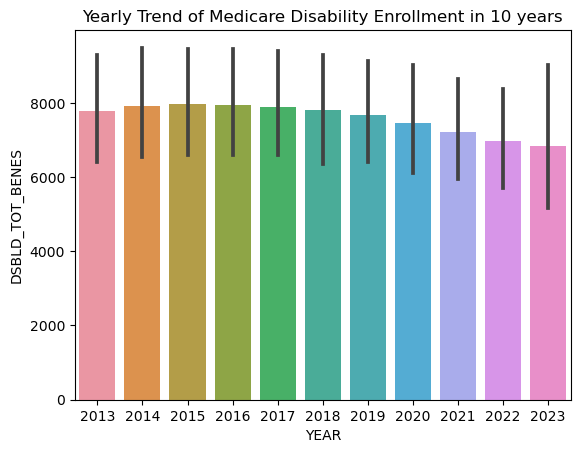

In [65]:
ax = sns.barplot(x='YEAR',y='DSBLD_TOT_BENES',data=df).set(title='Yearly Trend of Medicare Disability Enrollment in 10 years')

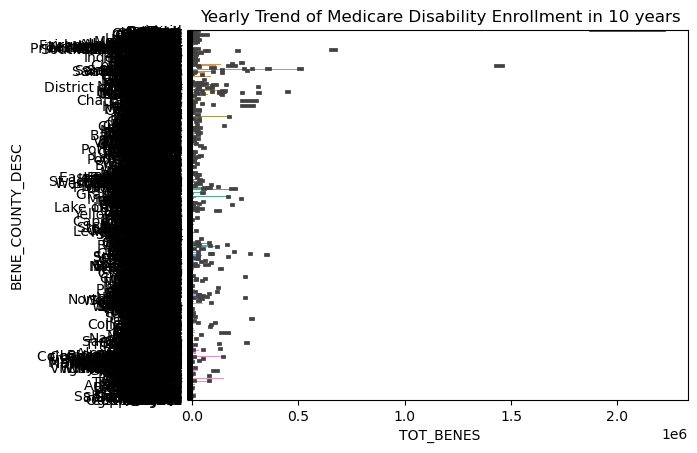

In [68]:
ax = sns.barplot(x='TOT_BENES',y='BENE_COUNTY_DESC',data=df).set(title='Yearly Trend of Medicare Disability Enrollment in 10 years')

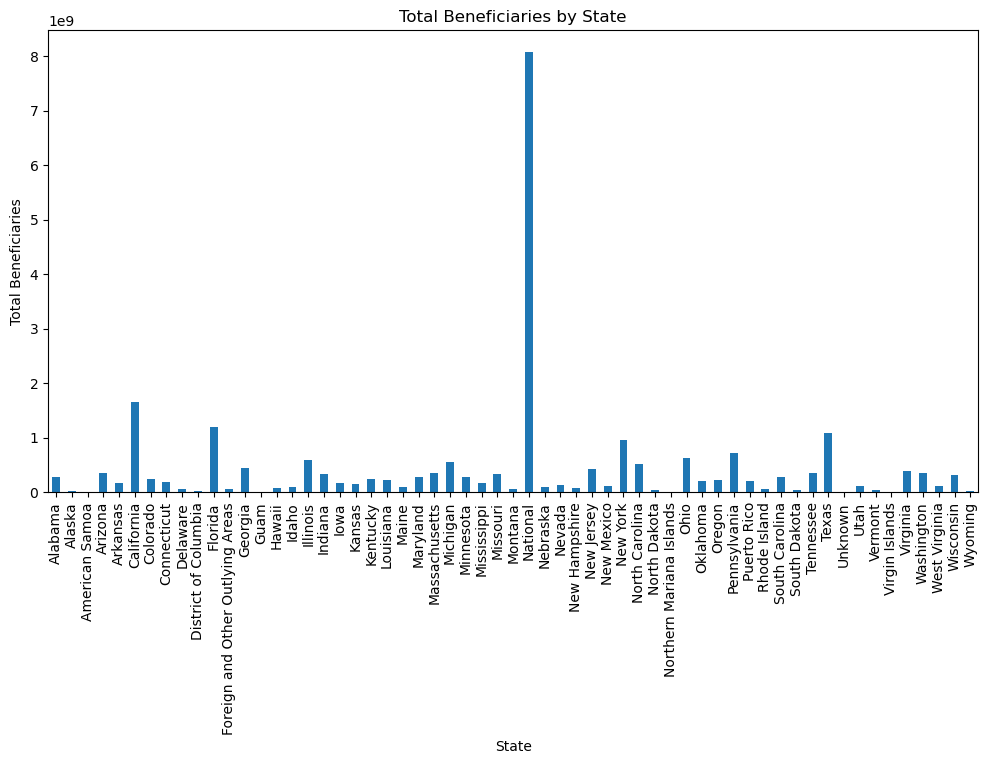

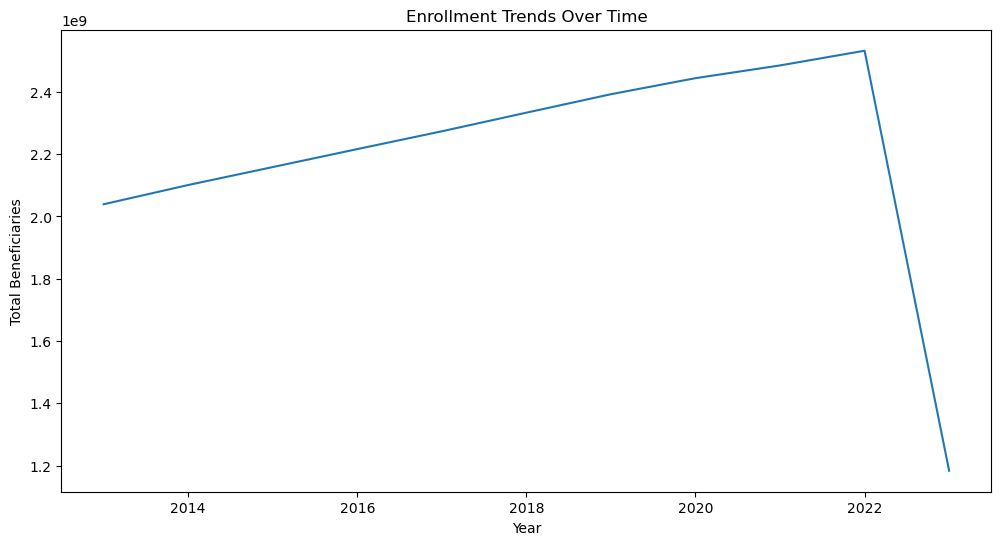

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = df.groupby('BENE_STATE_DESC')['TOT_BENES'].sum() 
grouped_df.plot(kind='bar', figsize=(12, 6))
plt.title('Total Beneficiaries by State')
plt.xlabel('State')
plt.ylabel('Total Beneficiaries')
plt.show()


df.groupby('YEAR')['TOT_BENES'].sum().plot(kind='line', figsize=(12, 6))
plt.title('Enrollment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Beneficiaries')
plt.show()


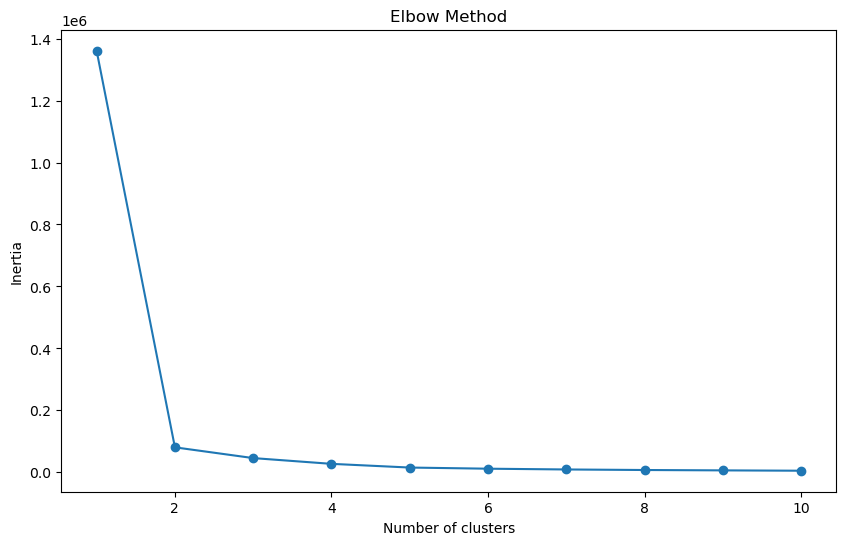

In [74]:
X = df[['TOT_BENES', 'ORGNL_MDCR_BENES', 'MA_AND_OTH_BENES']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()




In [80]:
from sklearn.metrics import silhouette_score

n_clusters_chosen = 2 
kmeans = KMeans(n_clusters=n_clusters_chosen, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.998893039802149


In [79]:
from sklearn.metrics import davies_bouldin_score

# Assuming 'clusters' is the output from your K-Means model and 'X_scaled' is your scaled feature set
davies_bouldin_index = davies_bouldin_score(X_scaled, clusters)
print("Davies-Bouldin Index: ", davies_bouldin_index)


Davies-Bouldin Index:  0.12248684456371374


In [83]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [84]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.998893039802149
